In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<h1> Review of Random Variables and Freqentist Statistics </h1>

<p> Let us consider the following situation: A ball is dropped from a height $y_{o}$ and you are sitting below with a timer, wanting to time it takes to fall, as shown below. Remembering your basic physics class you recall that you should get a time given by $t_{fall} = \sqrt{\frac{2y_{o}}{g}}$. If the ball is dropped from a height of 20 meters you calculate the fall time to be 2.02 seconds. Because of "experimental" error you take multiple measurements in order to ensure an accurate answer. </p>



<p> Before moving on, use the widget below to to answer the following questions </p>

<ol>
    <li> If you only take a single measurment of the fall time, how far off is it from the predicted value? What are some reasons for this? </li>
    <li> Using the slider, investigate the behavior of the distriubtion of arrival times. What do you notice as you increase the number of measurements?
    <li> In the case where we have multiple measurements, what are some ways we can describe the distribution? Relate these descriptions to any "mathematical terms" you may have learned previously.
</ol>





In [3]:
def free_fall_variance(y0, number_measurements, sigma):
    
    g = 9.81
    t_fall = np.sqrt(2*y0/g)
    mu = t_fall
    t_measured = np.random.normal(mu, sigma, number_measurements)
    t_measured = np.round(t_measured, 2)
    
    return t_measured



In [4]:
def f(number_measurements):
    
    t_measured = free_fall_variance(20, number_measurements, 0.25)
    binsize = np.int(np.round(np.sqrt(len(t_measured)))/(np.max(t_measured)-np.min(t_measured)))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(t_measured, edgecolor = 'black', bins = 20)
    ax.set_xlim([1, 3])
    ax.set_xlabel('Drop time (seconds)')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of Ball Drop Times')
    plt.show()
    
    return 
interact(f, number_measurements = (5, 1000))
plt.show()
        
        



<p3> Now let us consider the case where have 500 measurements, as shown below. </p3>

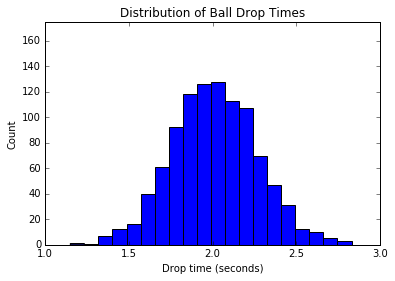

In [5]:
t_measured_fixed = free_fall_variance(20, 1000, 0.25)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(t_measured_fixed, edgecolor = 'black', bins = 20)
ax.set_xlim([1, 3])
ax.set_ylim([0, 175])
ax.set_xlabel('Drop time (seconds)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Ball Drop Times')
plt.show()

<h2> Definition of terms </h2>

<h3> Histograms </h3>

<p> 
As we increase the number of measurements the easiest way to view the data is in graphical form, as opposed to a long list of numbers. If we are looking at a single measurement, or observable, a useful way to view the data is in terms of a histogram (shown above). In a histogram we group data within a certain interval defined as bin size and count the number of times a data point shows up in a given bin. From here we can see how often shows which then allows us to have an idea where a new measurement might fall. </p>

<h3> Descriptive/Frequentist Statistics </h3>

<p> 
We see that not all of the data fall within a given bin as there is some error, or noise, in our ability to measure the drop time. We define the observable in this case as a random variate because each time we measure the observable we don't get the same value. Thus we want to address the following questions and be able to quantify them mathematically. 

    <ol>
        <li> What is the most frequent outcome? </li>
        <li> If we were to take a single measurement what is the most likely outcome? </li>
        <li> How much does our data vary? </li>
        <li> How do the previous questions influence the shape of the histogram? </li>
    </ol>
</p> 
<p> We can answer the above questions by defining the following terms. 

    <ol>
        <li> Mode: The most common occurrence of a given value </li>
        <li> Mean (also known as average or expected value): $\bar{x} = <x> = \frac{\sum_{i=1}^{N} x_{i}}{N}$ </li>
        <li> Standard Deviation: $\sigma =  \sqrt{<x - <x>>^{2}} = \sqrt{\sum_{i=1}^{N}(x_{i}-<x>)^{2}}$  </li>
        
    </ol>
</p>

<p>
At this point we will not worry about the mathematical definitions of these terms but rather their qualitative behavior. If we look at the distribution of drop times, the most frequent occurrence is given by the tallest bin. This is defined as the mode, and is calculated by just counting the occurences in each bin and picking the one with the highest count. The mean is defined as an average of all the drop times. The mean is a reflection of all of the drop times and is particularly sensitive to outlying data, which will be discussed later. The most important of these terms is the standard deviation, which can also be thought of as the uncertainty on a given measurement. If we were to drop a single ball and measure its fall time, it is unlikely that we would get the exact drop time of 2.02 seconds, rather we would get the drop time plus or minus some variation. The standard deviation is a way to measure the variation about a central value of the data (the mean). The studying and quantifying uncertainties will be very important in our study of model estimation, as it reflects our confidence in a given measurement. In the case of the histogram, the standard deviation can be roughly thought of as the width of a distribution, where wide distributions have a high standard deviation and thin distributions have a low standard deviation. </p>

<p> Using the widget below, investigate how the standard deviation influences the distribution of drop times. </p>



In [8]:
def f(standard_deviation):
    
    t_measured = free_fall_variance(20, 1000, standard_deviation)
    binsize = np.int(np.round(np.sqrt(len(t_measured)))/(np.max(t_measured)-np.min(t_measured)))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(t_measured, edgecolor = 'black', bins = 25)
    ax.set_xlim([0, 4])
    ax.set_xlabel('Drop time (seconds)')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of Ball Drop Times')
    ax.set_ylim([0, 225])
    plt.show()
    
    return 
interact(f, standard_deviation = (0.02, 0.75))
plt.show()